## Detección de objetos usando openCV
Curso: Aplicaciones de Machine Learning <br>
Actividad 3: Detección de objetos con OpenCV <br> <br>

Aqui vamos a probar una función integrada en openCV que sirve para detectar objetos. En este ejercicio detectaremos caras y ojos.

Objetivos:
1. Detectar caras y ojos con la función CascadeClassifier de openCV.

Dra. Jessica Beltrán Márquez <br>
jessicabeltran.net

### Obtener la imagen
Importamos las bibliotecas que vamos a utilizar.  
Leemos los modelos de clasificación para *rostros frontales* y para *ojos*. Estos modelos contienen valores numéricos que ya estan entrenados. <br>
Obtenemos la imagen a la cual le detectaremos los rostros y los ojos. <br>
Convertimos la imagen a grises ya que asi la requiere el clasificador.<br>
Desplegamos la imagen original.

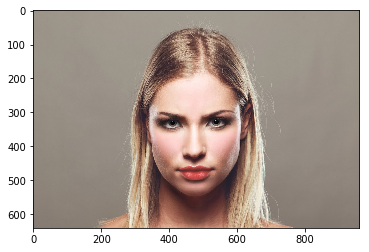

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Se cargan los modelos para detectar rostros y ojos
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#Se lee la imagen
img = cv2.imread('./images/face1.jpg')
#Se convierte a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgToShow =  img[:,:,::-1] 

#Se muestra la imagen
plt.imshow(imgToShow)     
plt.show()


Usamos el modelo de clasificador *face_cascade* para detectar el rostro pasandole como parametro la imagen en grises.

Esta función nos regresa las coordenadas para formar rectángulos en donde se incluyan rostros.
Por cada rostro, se dibuja un rectángulo con la función cv2.rectangle, Esta función recibe la imagen, las coordenadas para el rectángulo y el color del rectangulo.

Por cada rostro detectado, se utiliza el modelo de clasificador *eye_cascade*. A este clasificador se le pasa como parametro la imagen en grises contenida dentro del rectangulo correspondiente al rostro detectado.
Esta función regresa coordenadas de los ojos detectados.
Posteriormente se dibujan rectangulos alrededor de cada ojo detectado.



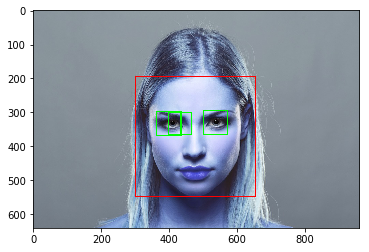

In [65]:
#Se utiliza el detector de rostros
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray, 1.01, 1)
for (x,y,w,h) in faces: #iterando en las coordenadas en donde se detectaron rostros con el modelo
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #Se dibujan los rectángulos en donde se encontraron rostros
    roi_gray = gray[y:y+h, x:x+w]  #region de interés de la imagen en gris
    roi_color = img[y:y+h, x:x+w]  #region de interés de la imagen a color
    #Se utiliza el detector de ojos
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes: #Iterando en las coordenadas de los ojos encontrados
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Se dibujan rectángulos en donde se encontraron ojos

plt.imshow(img)     
plt.show()
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

OpenCV incluye más modelos de clasificación para otros objetos. Puedes revisar algunos en esta liga:
https://github.com/opencv/opencv/tree/master/data/haarcascades

### ¿Porqué se dibuja el rectangulo sobre los ojos si solo se pasa la región de la cara y no la imagen completa?

En esta línea
cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) <br>
Se pasa como parámetro roi_color como la imagen en donde se dibujaran los rectángulos de los ojos. Sin embargo, a pesar que solo representa la región en donde se encontró un rosto, al dibujarse los rectangulos de los ojos si quedan dibujados en los lugares correspondientes. <br>

Esto se debe a que cuando se trabaja con arreglos de numpy, y una variable se iguala a un arreglo o a un segmento (slice) de un arreglo, los valores se pasan como referencia y no como copia (por lo que hay que tener cuidado de no encimar valores). <br>
A continuación un ejemplo:

In [64]:
#Se crea un arreglo numpy
a = np.array([1, 3, 4, 5, 6 ,7])
print("Arreglo a original: ", a)
#Se crea el arreglo b con un segmento de a
b = a[:3]
#Se modifica un elemento de b
b[0]=9
#Como los valores se pasaron como referencia, también se modifica a
print("Arreglo b: ", b)
print("Arreglo a modificado: ", a)

Arreglo a original:  [1 3 4 5 6 7]
Arreglo b:  [9 3 4]
Arreglo a modificado:  [9 3 4 5 6 7]
